In [4]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import datetime

In [5]:
# importing required libraries
import pandas as pd
import numpy as np

# Now, we will load the data set and look at some initial rows and data types of the columns:
ts_data = pd.read_csv('C:\\Users\\Recherche\\Desktop\\Average.csv')
print (ts_data.head())
print ('\n Data Types:')
print (ts_data.dtypes)


      Date  cpu_percent_1 worker per core  user_count
0  8:16:01                         99.225           5
1  8:16:53                         99.175           5
2  8:17:06                        100.195           5
3  8:17:19                        101.335           5
4  8:17:32                         99.175           5

 Data Types:
Date                              object
cpu_percent_1 worker per core    float64
user_count                         int64
dtype: object


In [6]:
ts_data.head()

,Date,cpu_percent_1 worker per core,user_count
0,8:16:01,99.225,5
1,8:16:53,99.175,5
2,8:17:06,100.195,5
3,8:17:19,101.335,5
4,8:17:32,99.175,5


In [7]:
ts_data = pd.read_csv('C:\\Users\\Recherche\\Desktop\\Average.csv',index_col='Date',parse_dates=True)

In [8]:
ts_data.head()

,cpu_percent_1 worker per core,user_count
Date,,
2022-06-21 08:16:01,99.225,5
2022-06-21 08:16:53,99.175,5
2022-06-21 08:17:06,100.195,5
2022-06-21 08:17:19,101.335,5
2022-06-21 08:17:32,99.175,5


In [9]:
ts_data.index

DatetimeIndex(['2022-06-21 08:16:01', '2022-06-21 08:16:53',
               '2022-06-21 08:17:06', '2022-06-21 08:17:19',
               '2022-06-21 08:17:32', '2022-06-21 08:17:45',
               '2022-06-21 08:17:58', '2022-06-21 08:18:11',
               '2022-06-21 08:18:37', '2022-06-21 08:18:50',
               ...
               '2022-06-21 09:31:55', '2022-06-21 09:32:08',
               '2022-06-21 09:32:21', '2022-06-21 09:32:34',
               '2022-06-21 09:32:47', '2022-06-21 09:33:00',
               '2022-06-21 09:33:14', '2022-06-21 09:33:27',
               '2022-06-21 09:33:40', '2022-06-21 09:33:53'],
              dtype='datetime64[ns]', name='Date', length=355, freq=None)

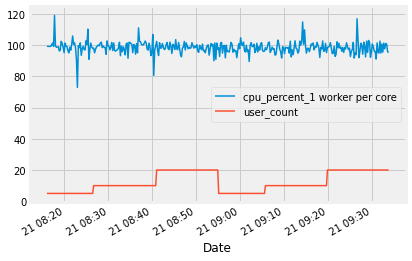

In [10]:
ts_data.plot();

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
from pylab import rcParams

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
from statsmodels.tsa.stattools import adfuller

In [25]:
dfset=adfuller(ts_data["cpu_percent_1 worker per core"],autolag='AIC')

In [26]:
dfset

(-18.63495734490759,
 2.0561800844892485e-30,
 0,
 354,
 {'1%': -3.4489583388155194,
  '5%': -2.869739378430086,
  '10%': -2.5711381780459},
 1865.128514058873)

In [27]:
dfout=pd.Series(dfset[0:4],index=['Test statistic','p-value','#Lags used','Number of observations used'])

In [28]:
dfout

Test statistic                -1.863496e+01
p-value                        2.056180e-30
#Lags used                     0.000000e+00
Number of observations used    3.540000e+02
dtype: float64

In [29]:
for key, value in dfset[4].items():
    dfout[key]=value

In [30]:
dfout

Test statistic                -1.863496e+01
p-value                        2.056180e-30
#Lags used                     0.000000e+00
Number of observations used    3.540000e+02
1%                            -3.448958e+00
5%                            -2.869739e+00
10%                           -2.571138e+00
dtype: float64

In [32]:
IndDataLog=np.log(ts_data)

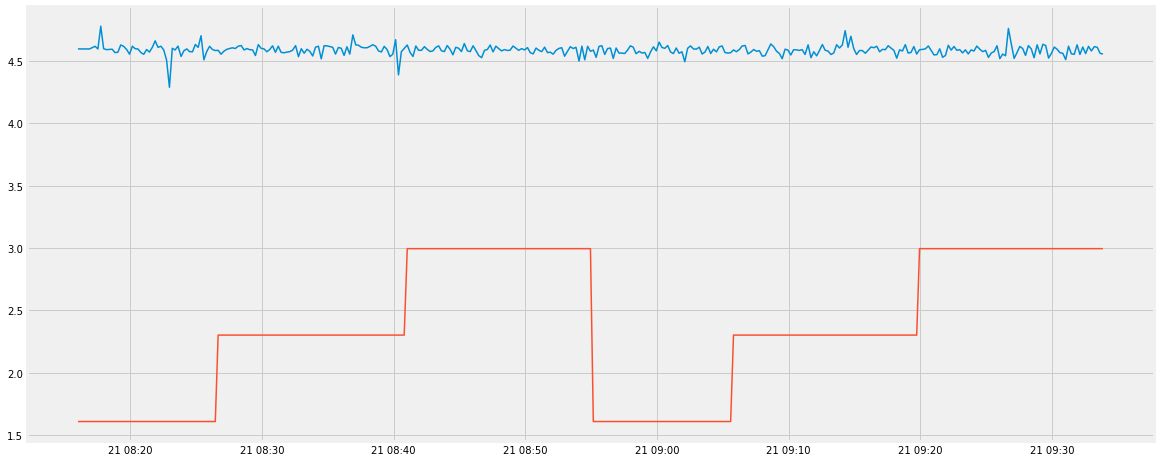

In [33]:
plt.plot(IndDataLog)

In [34]:
movAv=IndDataLog.rolling(window=12).mean()

In [35]:
movAv

,cpu_percent_1 worker per core,user_count
Date,,
2022-06-21 08:16:01,NaN,NaN
2022-06-21 08:16:53,NaN,NaN
2022-06-21 08:17:06,NaN,NaN
2022-06-21 08:17:19,NaN,NaN
2022-06-21 08:17:32,NaN,NaN
...,...,...
2022-06-21 09:33:00,4.577138,2.995732
2022-06-21 09:33:14,4.581236,2.995732
2022-06-21 09:33:27,4.585236,2.995732


In [36]:
movSTD=IndDataLog.rolling(window=12).std()
movSTD

,cpu_percent_1 worker per core,user_count
Date,,
2022-06-21 08:16:01,NaN,NaN
2022-06-21 08:16:53,NaN,NaN
2022-06-21 08:17:06,NaN,NaN
2022-06-21 08:17:19,NaN,NaN
2022-06-21 08:17:32,NaN,NaN
...,...,...
2022-06-21 09:33:00,0.035562,0.0
2022-06-21 09:33:14,0.037044,0.0
2022-06-21 09:33:27,0.037387,0.0


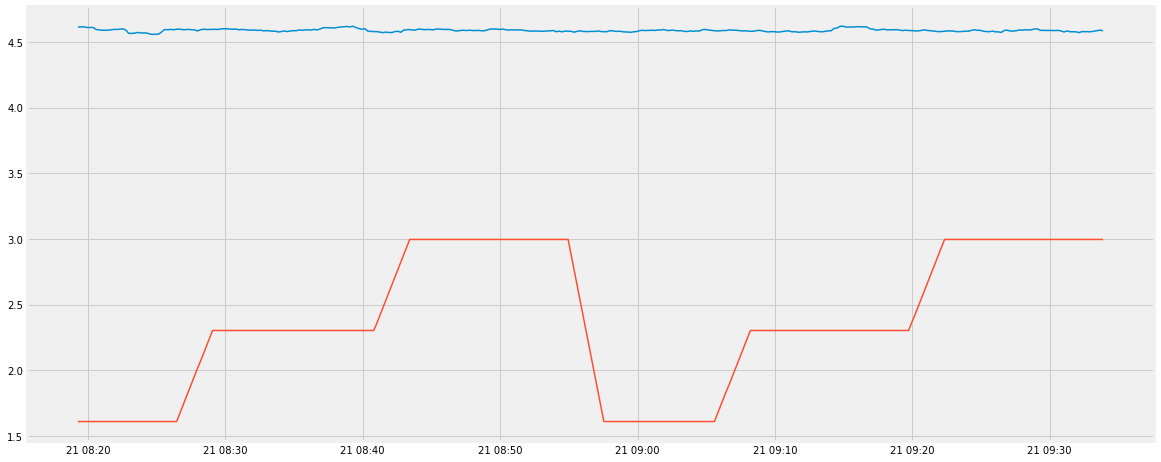

In [37]:
plt.plot(movAv)

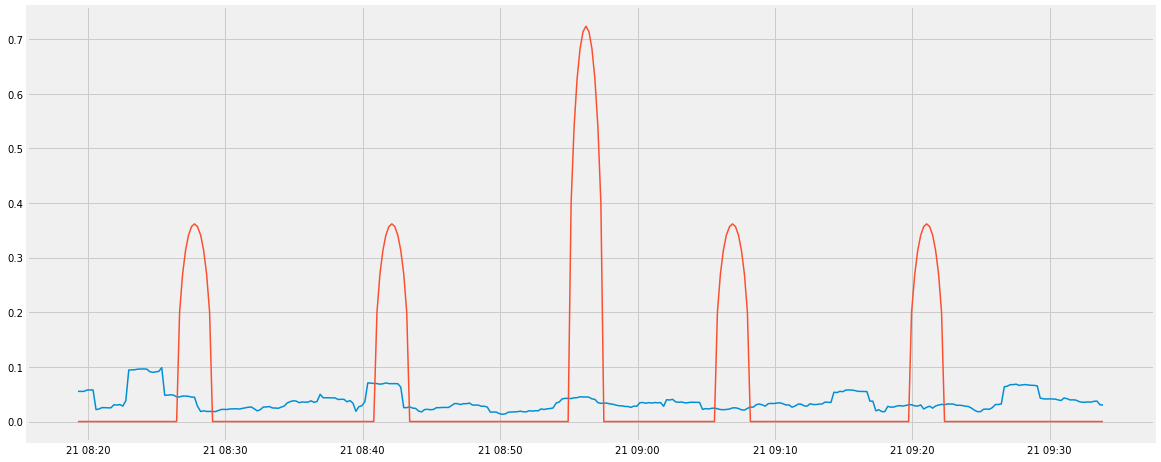

In [38]:
plt.plot(movSTD)

In [39]:
DLMV=IndDataLog-movAv

In [40]:
DLMV

,cpu_percent_1 worker per core,user_count
Date,,
2022-06-21 08:16:01,NaN,NaN
2022-06-21 08:16:53,NaN,NaN
2022-06-21 08:17:06,NaN,NaN
2022-06-21 08:17:19,NaN,NaN
2022-06-21 08:17:32,NaN,NaN
...,...,...
2022-06-21 09:33:00,0.004047,0.0
2022-06-21 09:33:14,0.034577,0.0
2022-06-21 09:33:27,0.024922,0.0


In [41]:
DLMV.head()

,cpu_percent_1 worker per core,user_count
Date,,
2022-06-21 08:16:01,NaN,NaN
2022-06-21 08:16:53,NaN,NaN
2022-06-21 08:17:06,NaN,NaN
2022-06-21 08:17:19,NaN,NaN
2022-06-21 08:17:32,NaN,NaN


In [42]:
DLMV.dropna(inplace=True)

In [43]:
DLMV

,cpu_percent_1 worker per core,user_count
Date,,
2022-06-21 08:19:16,0.016695,0.000000e+00
2022-06-21 08:19:29,0.003971,0.000000e+00
2022-06-21 08:19:43,-0.021494,-2.220446e-16
2022-06-21 08:19:56,-0.054215,0.000000e+00
2022-06-21 08:20:09,0.009154,0.000000e+00
...,...,...
2022-06-21 09:33:00,0.004047,0.000000e+00
2022-06-21 09:33:14,0.034577,0.000000e+00
2022-06-21 09:33:27,0.024922,0.000000e+00


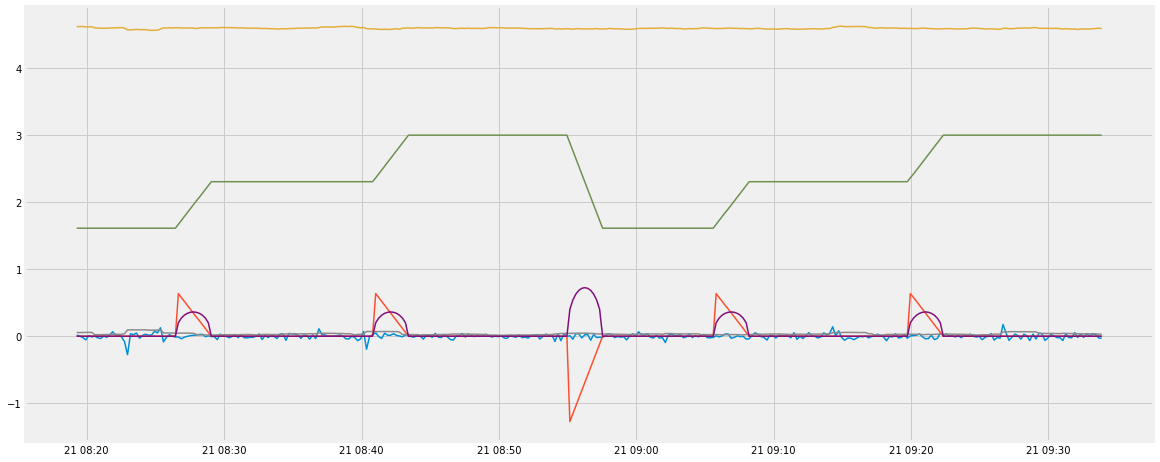

In [44]:
plt.plot(DLMV)
plt.plot(movAv)
plt.plot(movSTD)

In [53]:
rolling_mean = ts_data.rolling(13).mean()
rolling_std = ts_data.rolling(13).std()

In [54]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean &amp; Standard Deviation')
    plt.show(block=False)

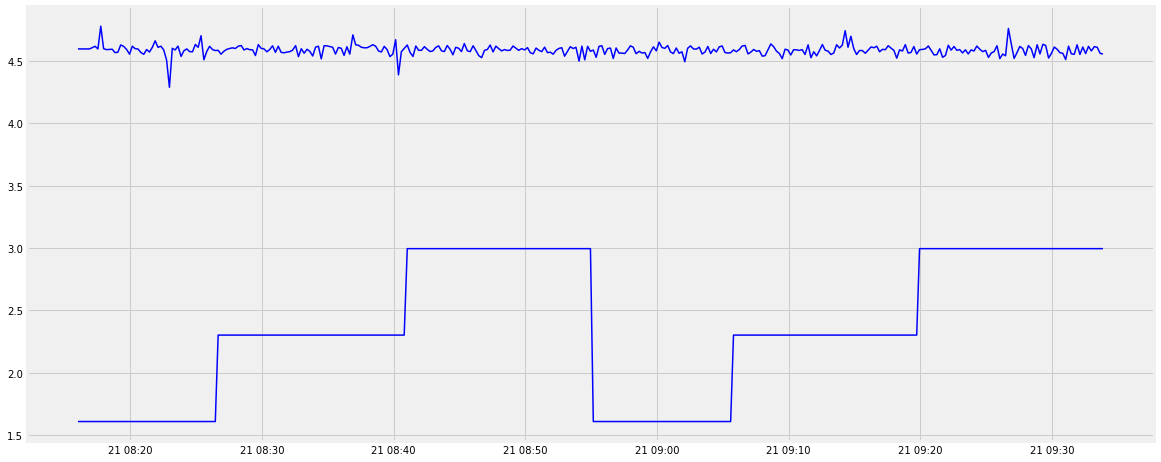

In [51]:
plt.plot(IndDataLog, color='blue',label='Original')

In [58]:
timeseries = ts_data['cpu_percent_1 worker per core']

In [59]:
type(timeseries)

pandas.core.series.Series

<AxesSubplot:xlabel='Date'>

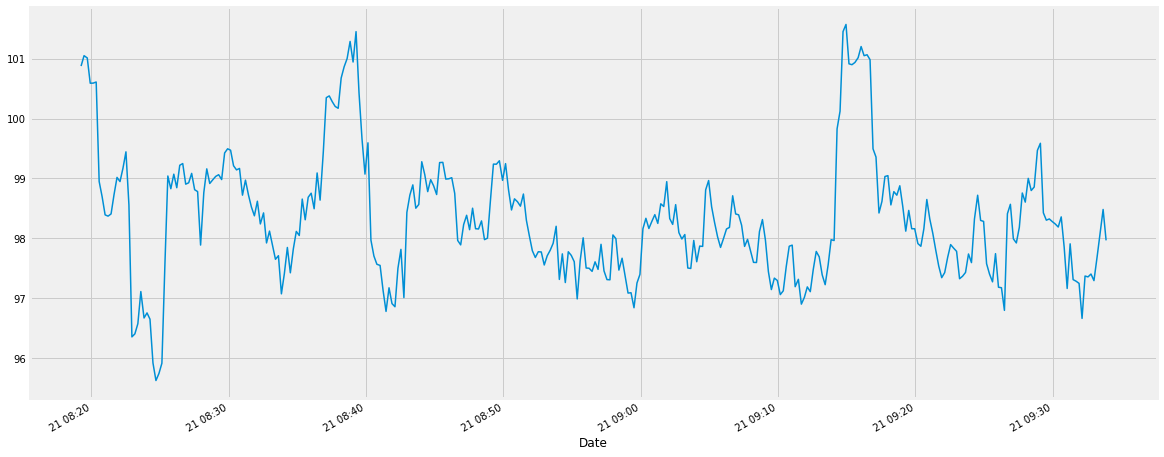

In [60]:
timeseries.rolling(12).mean().plot(label='12 Time Rolling Mean')

<AxesSubplot:xlabel='Date'>

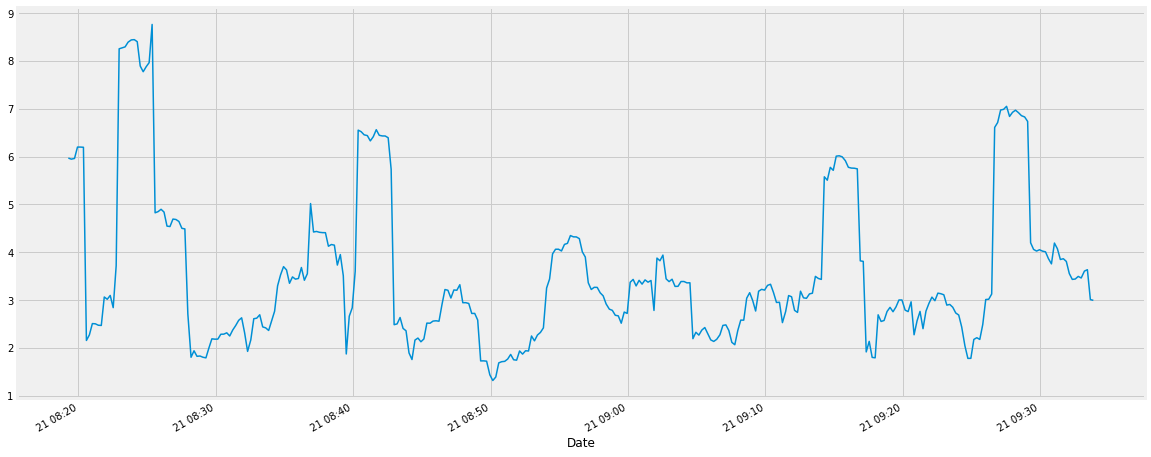

In [61]:
timeseries.rolling(12).std().plot(label='12 Time Rolling Std')

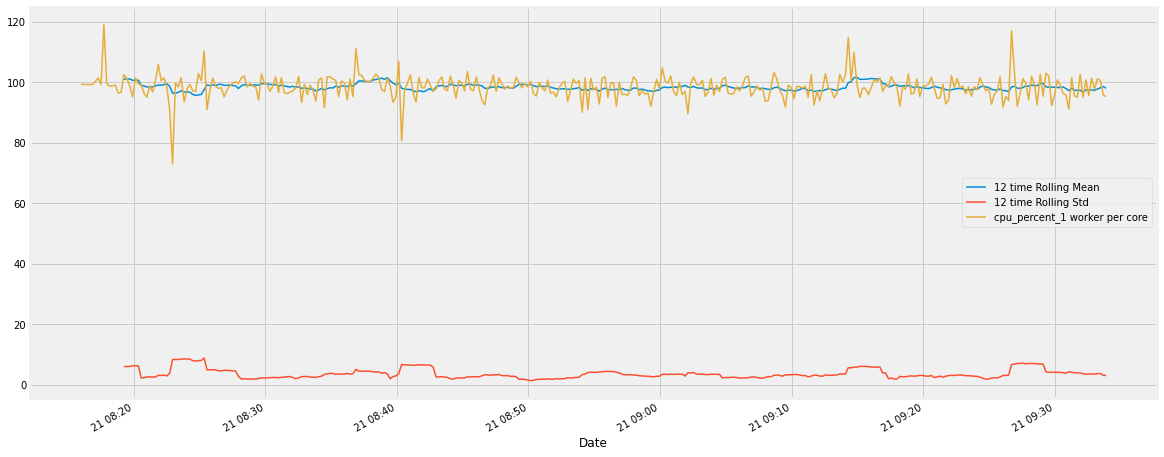

In [63]:
timeseries.rolling(12).mean().plot(label='12 time Rolling Mean')
timeseries.rolling(12).std().plot(label='12 time Rolling Std')
timeseries.plot()
plt.legend()

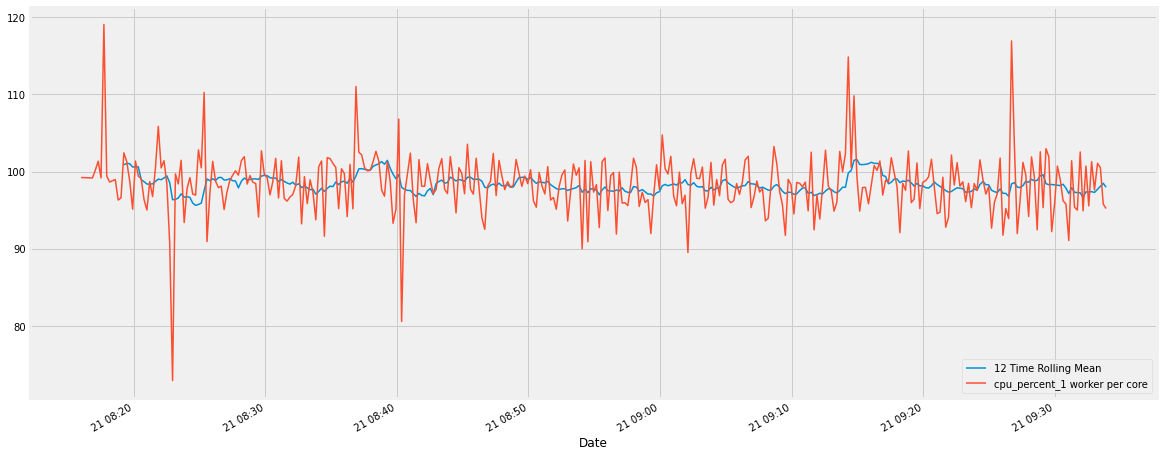

In [64]:
timeseries.rolling(12).mean().plot(label = '12 Time Rolling Mean')
timeseries.plot()
plt.legend()

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [67]:
decomposition = seasonal_decompose(ts_data['cpu_percent_1 worker per core'],freq = 12)  

<ipython-input-67-828f05b31f74>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(ts_data['cpu_percent_1 worker per core'],freq = 12)


<Figure size 1296x576 with 0 Axes>

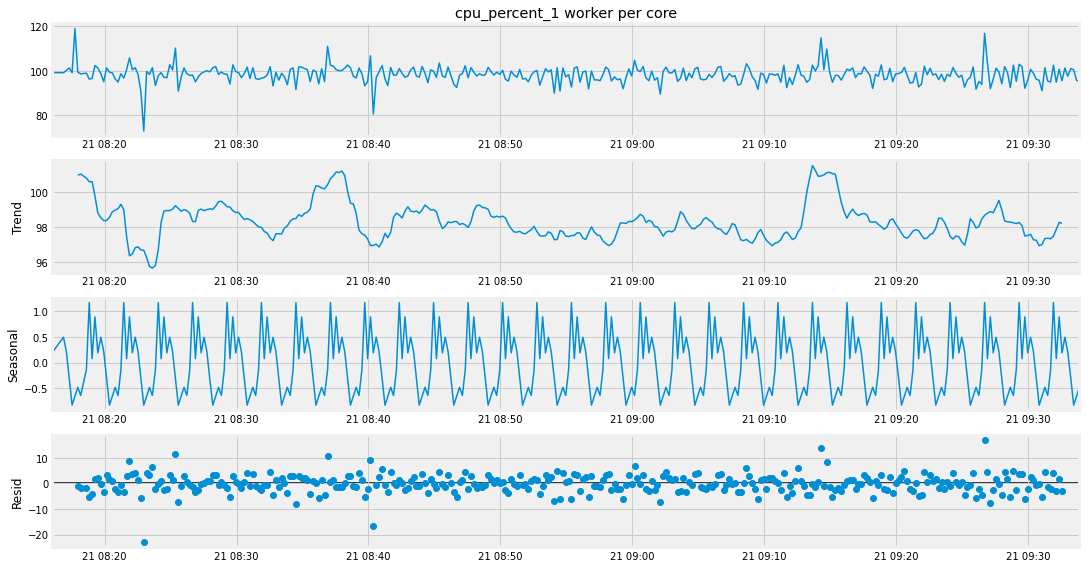

In [68]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [70]:
ts_data.head()

,cpu_percent_1 worker per core,user_count
Date,,
2022-06-21 08:16:01,99.225,5
2022-06-21 08:16:53,99.175,5
2022-06-21 08:17:06,100.195,5
2022-06-21 08:17:19,101.335,5
2022-06-21 08:17:32,99.175,5


In [71]:
from statsmodels.tsa.stattools import adfuller

In [74]:
result = adfuller(ts_data['cpu_percent_1 worker per core'])

In [75]:
labels = ['ADF Test Statistic',
          'p-value',
          '#Lags Used',
          'Number of Observations Used']

In [76]:
labels

['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

In [77]:
for value,label in zip(result,labels):
    print(label+' : '+str(value) )

ADF Test Statistic : -18.63495734490759
p-value : 2.0561800844892485e-30
#Lags Used : 0
Number of Observations Used : 354


In [78]:
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [79]:
from statsmodels.tsa.arima_model import ARIMA

In [82]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(ts_data['cpu_percent_1 worker per core'],order = (0,1,0),seasonal_order = (1,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [83]:
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:        cpu_percent_1 worker per core   No. Observations:                  355
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1087.945
Date:                              Tue, 21 Jun 2022   AIC                           2181.889
Time:                                      02:23:02   BIC                           2193.394
Sample:                                           0   HQIC                          2186.472
                                              - 355                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0730      0.059     -1.238      0.216      -0.189       0.043
ma.S.L12      -0.83

<AxesSubplot:xlabel='Date'>

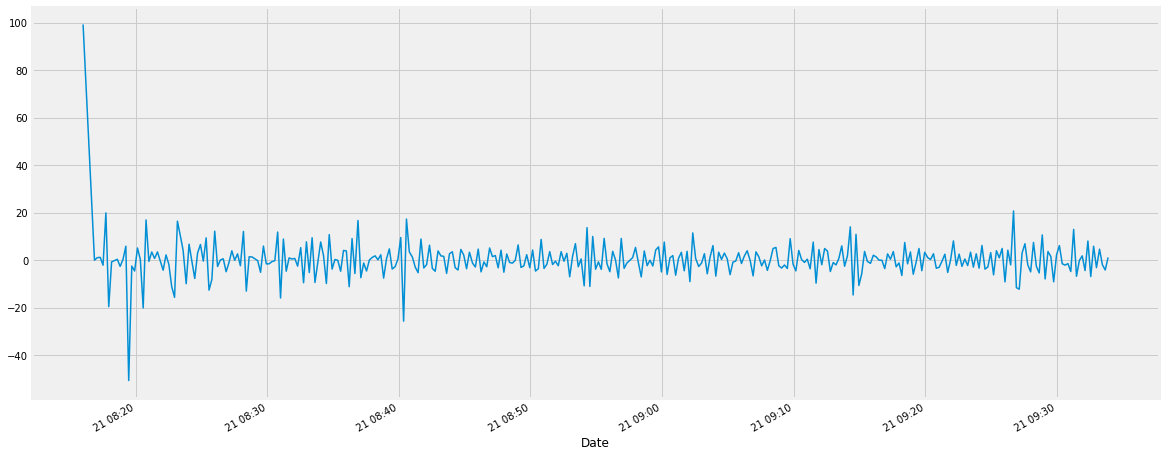

In [84]:
results.resid.plot()

<AxesSubplot:xlabel='Date'>

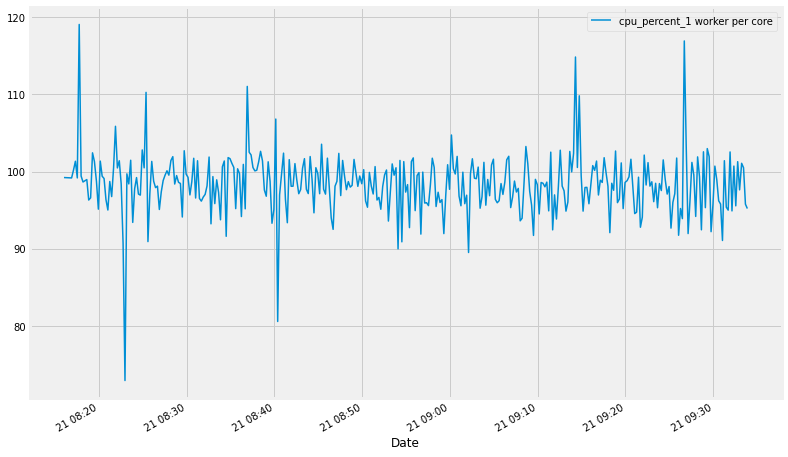

In [88]:
ts_data['forecast'] = results.predict(start = 10,end = 30,dynamic = True)  
ts_data[['cpu_percent_1 worker per core']].plot(figsize = (12, 8))

In [91]:
from pandas.tseries.offsets import DateOffset

In [93]:
future_dates = [ts_data.index[-1] + DateOffset(months = x) for x in range(0,24) ]

In [94]:
future_dates

[Timestamp('2022-06-21 09:33:53'),
 Timestamp('2022-07-21 09:33:53'),
 Timestamp('2022-08-21 09:33:53'),
 Timestamp('2022-09-21 09:33:53'),
 Timestamp('2022-10-21 09:33:53'),
 Timestamp('2022-11-21 09:33:53'),
 Timestamp('2022-12-21 09:33:53'),
 Timestamp('2023-01-21 09:33:53'),
 Timestamp('2023-02-21 09:33:53'),
 Timestamp('2023-03-21 09:33:53'),
 Timestamp('2023-04-21 09:33:53'),
 Timestamp('2023-05-21 09:33:53'),
 Timestamp('2023-06-21 09:33:53'),
 Timestamp('2023-07-21 09:33:53'),
 Timestamp('2023-08-21 09:33:53'),
 Timestamp('2023-09-21 09:33:53'),
 Timestamp('2023-10-21 09:33:53'),
 Timestamp('2023-11-21 09:33:53'),
 Timestamp('2023-12-21 09:33:53'),
 Timestamp('2024-01-21 09:33:53'),
 Timestamp('2024-02-21 09:33:53'),
 Timestamp('2024-03-21 09:33:53'),
 Timestamp('2024-04-21 09:33:53'),
 Timestamp('2024-05-21 09:33:53')]

In [96]:
future_dates_ts_data = pd.DataFrame(index = future_dates[1:],columns = ts_data.columns)

In [98]:
future_ts_data = pd.concat([ts_data,future_dates_ts_data])

In [100]:
future_ts_data.head()

,cpu_percent_1 worker per core,user_count,forecast
2022-06-21 08:16:01,99.225,5,NaN
2022-06-21 08:16:53,99.175,5,NaN
2022-06-21 08:17:06,100.195,5,NaN
2022-06-21 08:17:19,101.335,5,NaN
2022-06-21 08:17:32,99.175,5,NaN


In [102]:
future_ts_data.tail()

,cpu_percent_1 worker per core,user_count,forecast
2024-01-21 09:33:53,NaN,NaN,NaN
2024-02-21 09:33:53,NaN,NaN,NaN
2024-03-21 09:33:53,NaN,NaN,NaN
2024-04-21 09:33:53,NaN,NaN,NaN
2024-05-21 09:33:53,NaN,NaN,NaN
